In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the data
df = pd.read_csv('../input/2014-new-york-city-taxi-trips/nyc_taxi_data_2014.csv')
df

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.70,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.00,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.40,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.00,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.30,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.00,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.70,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.00,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.90,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.00,8.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14999994,VTS,2014-02-03 19:28:00,2014-02-03 19:37:00,5,1.36,-73.991223,40.718037,1,NaN,-74.000675,40.725737,CRD,7.5,1.0,0.5,1.00,0.00,10.00
14999995,VTS,2014-02-07 00:55:00,2014-02-07 01:15:00,1,4.26,-73.990247,40.737442,1,NaN,-73.991287,40.692535,CRD,17.5,0.5,0.5,2.00,0.00,20.50
14999996,VTS,2014-02-03 18:08:00,2014-02-03 19:29:00,1,57.84,-73.789527,40.645007,5,NaN,-73.776505,40.740790,CSH,153.0,0.0,0.0,0.00,7.08,160.08
14999997,VTS,2014-02-07 00:58:00,2014-02-07 01:12:00,1,3.40,-73.983495,40.694153,1,NaN,-74.005953,40.710922,CRD,14.0,0.5,0.5,2.90,0.00,17.90


In [2]:
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.499985e+07,1.499985e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07
mean,1.701826e+00,2.792074e+00,-7.296749e+01,4.019355e+01,1.033778e+00,-7.290756e+01,4.016132e+01,1.201335e+01,3.145898e-01,4.982227e-01,1.455907e+00,2.404203e-01,1.452348e+01
std,1.390736e+00,3.326122e+00,8.586309e+00,4.762641e+00,7.177268e-01,8.843060e+00,4.897983e+00,1.006726e+01,3.633407e-01,2.975721e-02,2.244646e+00,1.191025e+00,1.216687e+01
min,0.000000e+00,0.000000e+00,-7.366000e+02,-1.800000e+02,0.000000e+00,-7.754167e+02,-1.800000e+02,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,1.000000e+00,1.000000e+00,-7.399198e+01,4.073535e+01,1.000000e+00,-7.399135e+01,4.073420e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,1.000000e+00,1.700000e+00,-7.398183e+01,4.075298e+01,1.000000e+00,-7.398007e+01,4.075337e+01,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,2.000000e+00,3.080000e+00,-7.396735e+01,4.076724e+01,1.000000e+00,-7.396351e+01,4.076839e+01,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.610000e+01
max,2.080000e+02,1.000000e+02,8.054390e+01,7.328431e+01,2.100000e+02,1.193360e+02,4.040833e+02,5.000000e+02,1.340000e+01,5.000000e-01,2.000000e+02,2.000000e+01,7.000000e+02


Understanding the data

In [3]:
def min_max():
    print(df['pickup_longitude'].max(),df['pickup_longitude'].min())
    print(df['pickup_latitude'].max(),df['pickup_latitude'].min())

    print(df['dropoff_longitude'].max(),df['dropoff_longitude'].min())
    print(df['dropoff_latitude'].max(),df['dropoff_latitude'].min())
min_max()

80.543897 -736.6
73.28431299999998 -180.0
119.336005 -775.4166649999999
404.083332 -180.0


In [4]:
def coordinate_data():
    print(df[(df['pickup_longitude']>180) |(df['pickup_longitude']<-180) | (df['pickup_longitude']==0) ]['pickup_longitude'].count())
    print(df[(df['pickup_latitude']>90) |(df['pickup_latitude']<-90) | (df['pickup_latitude']==0) ]['pickup_latitude'].count())
    print(df[(df['dropoff_longitude']>180) |(df['dropoff_longitude']<-180) | (df['dropoff_longitude']==0)]['dropoff_longitude'].count())
    print(df[(df['dropoff_latitude']>90) |(df['dropoff_latitude']<-90) | (df['dropoff_latitude']==0) ]['dropoff_latitude'].count())

coordinate_data()

204550
204653
216569
216661


Preporcessing the data

In [5]:
df=df.dropna()
df.shape

(7363922, 18)

Plotting the data

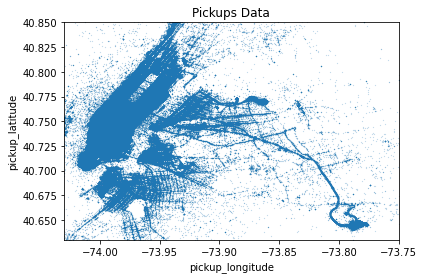

In [6]:
df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

# Conclusion
Downloading the data from http://www.andresmh.com/nyctaxitrips/ took immense amount of time as it is roughy 3.8GB data.

The data used here is of 2.36GB, observations while performing the practical were:
1. It took around 5-7 minuted for the data to load and thus working on cloud was a better option than downloading the data
2. As simple preporocessing steps were performed it didnt take much time to preprocess
3. plotting was a computational expensive task, it took the whole CPU and RAM for plotting and thus Kaggle gave me the warning : "Your notebook tried to allocate more memory than is available. It has restarted."
4. First time iterating over the task is expensive both in terms of time and computational resources

The above limitations can be overcomes by:
1. Apache Hadoop is a big data processing framework that exclusively provides batch processing. 
2. MapReduce on top of Hadoop is a popular parallel programming model
3. A task-scheduling algorithm that is based on efficiency and equity.

